# 다항 분포

* K를 표기하지 않은 이유는 세타 안에 포함되어 있기 때문
* 카테고리에서는 N값을 1로 해서 생략. 여기서는 지정해줘야 한다.
* countplot으로는 여기서 못 그린다.
* 세타가 0.1이고 N이 30인 분포를 그려보아라.

베르누이 시도를 여러번 하여 얻은 총 성공 횟수 합이 이항 분포를 이루는 것처럼 독립적인 카테고리 분포를 여러번 시도하여 얻은 각 원소의 성공횟수 값은 다항 분포(Multinomial distribution)을 이룬다.

다항 분포는 확률 모수가 $\theta = (\theta_1, \cdots, \theta_K)$인 독립적인 카테고리 시도를 $N$번 반복해서 $k$가 각각 $x_k$번 나올 확률 즉, 벡터 $x = (x_1, \cdots, x_K)$가 나올 확률 분포를 말한다. $\text{Mu}(x;N,\theta) $와 같이 표기하며 다음과 같은 수식을 따른다.

$$ \text{Mu}(x;N,\theta) = \binom N x  \prod_{k=1}^K \theta_k^{x_k} = \binom N {x_1, \cdots, x_K} \prod_{k=1}^K \theta_k^{x_k} $$

이 식에서 
$$ \binom N {x_1, \cdots, x_K} = \dfrac{N!}{x_1! \cdots x_K!} $$

다항 분포의 기댓값과 분산은 다음과 같다.

* 기댓값
$$\text{E}[x_k] = N\theta_k$$

* 분산
$$\text{Var}[x_k] = N\theta_k(1-\theta_k)$$

SciPy는 다항 분포를 위한 별도의 클래스나 명령어를 제공하지 않고 NumPy의 random 서브패키지에서 다항 분포 샘플 생성을 하는  `multinomial` 명령어를 지원한다.

`n` 인수는 시행 횟수 $N$을 설정하고 `pvals`에 모수 벡터 $\theta$를 설정한다.

In [3]:
np.random.seed(0)
N = 30
theta = np.array([0, 0, 0.1, 0.2, 0.3, 0.4])
X = np.random.multinomial(N, theta, size=100)
X[:5], len(X)

(array([[ 0,  0,  3,  6,  9, 12],
        [ 0,  0,  5,  9,  6, 10],
        [ 0,  0,  3,  9,  5, 13],
        [ 0,  0,  5,  7, 10,  8],
        [ 0,  0,  3,  8,  6, 13]]), 100)

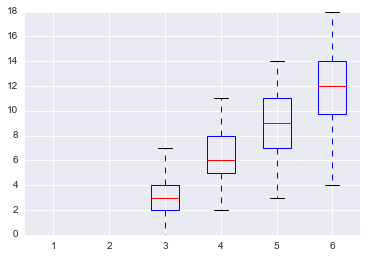

In [4]:
plt.boxplot(X)
plt.show()

In [7]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["trial", "class", "binomial"]
df.head()

,trial,class,binomial
0,0,0,0
1,0,1,0
2,0,2,3
3,0,3,6
4,0,4,9


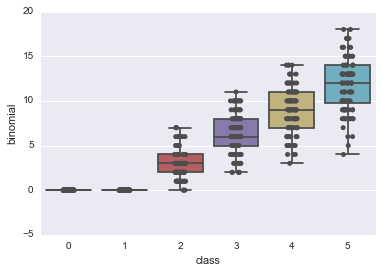

In [8]:
sns.boxplot(x="class", y="binomial", data=df)
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.show()

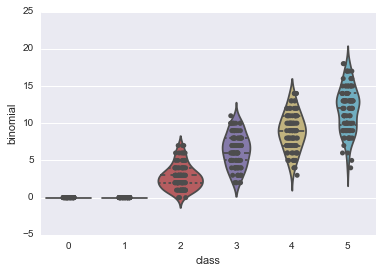

In [9]:
sns.violinplot(x="class", y="binomial", data=df, inner="quartile")
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.show()